<span style="font-size: 18px;">**Analysis of 2-Node Network**</span>    
*Group members: Jacob Silver, Justin Williams, Gregg Maloy*

Using the 'Davis Southern Women Club' dataset we will provide analysis of a small network of women who attend different social events.  Various measures of centrality will be calculated and these measures will provide guidance to make inferences regarding member relationships and meetings.  Finally, the 'island method' will be used to view the network with the highest degree centrality. 

***Step 1: Load Packages & Data***     
For this analysis networkx and matplotlib packages were utilized.  The 'Davis Southern Women Club' comes prepackaged in networkx, but also can be located [here](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat).   The 'Davis Southern Women Club' dataset itself represents attendance records at 14 different social events by 18 women in the 1930s United States.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

#create a graph 'G'using function' davis_southern_women_graph' from networkx
G = nx.davis_southern_women_graph()

***Step 2: Data Inspection & Manipulation***   
In order to account for the bi-nodal nature of the dataset, the data was partitioned. 
Bi-Nodal datasets are typically partition prior to analysis, with the analysis conducted on the node(s) of interest.
We partitioned the 'Davis Southern Women Club' dataset based on:   
<blockquote>1. members</blockquote>  
<blockquote>2. clubs</blockquote>
The data was then loaded into a matrix and some exploratory data analysis conducted
There were 14 different meetings and 18 different members.

In [93]:
# Partition the data
women = G.graph["top"]
clubs = G.graph["bottom"]

# Number of women and meetings present in the dataset
print("Members:")
print(list(women))
print("\nMeetings:")
print(list(clubs))

# biadjacency matrix
biadj_matrix = bipartite.biadjacency_matrix(G, women, clubs)
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# The number of meetings attended by each member
member_counts = biadj_matrix.sum(axis=1)

# The number of members attending each meeting
meeting_counts = biadj_matrix.sum(axis=0)

# Print the number of meetings attended by each member
print("\nNumber of meetings attended by each member:")
attendances = [(member, count) for member, count in zip(women, member_counts.A1)]
sorted_attendances = sorted(attendances, key=lambda x: x[1], reverse=True)
for member, count in sorted_attendances:
    print(f"Member {member}: {count}")
    
# Print the number of members attending each meeting
print("\nNumber of members attending each meeting:")
for meeting, count in zip(clubs, meeting_counts.A1):
    print(f"Meeting {meeting}: {count}")

Members:
['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']

Meetings:
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']
Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  

C:\Users\maric\AppData\Local\Temp\ipykernel_29060\59280415.py:12: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  biadj_matrix = bipartite.biadjacency_matrix(G, women, clubs)
C:\Users\maric\AppData\Local\Temp\ipykernel_29060\59280415.py:14: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(bipartite.biadjacency_matrix(G, women, clubs))


Next, we confirmed that for each node there is at least one edge via the 'is_connected' command, while also confirming that graph 'G' is bi-partite via the 'is_partite' command.

In [94]:
#tesing data- for each node there is at least one edge
print(nx.is_connected(G))

#Returns True if graph G is bipartite, False if not.
print(nx.is_bipartite(G))

True
True


***Step 3: Visualizing the Graphs***   
Below the complete 'Davis Southern Women's Club Network' is graphed. The graph hints at high connectiviness between members. 

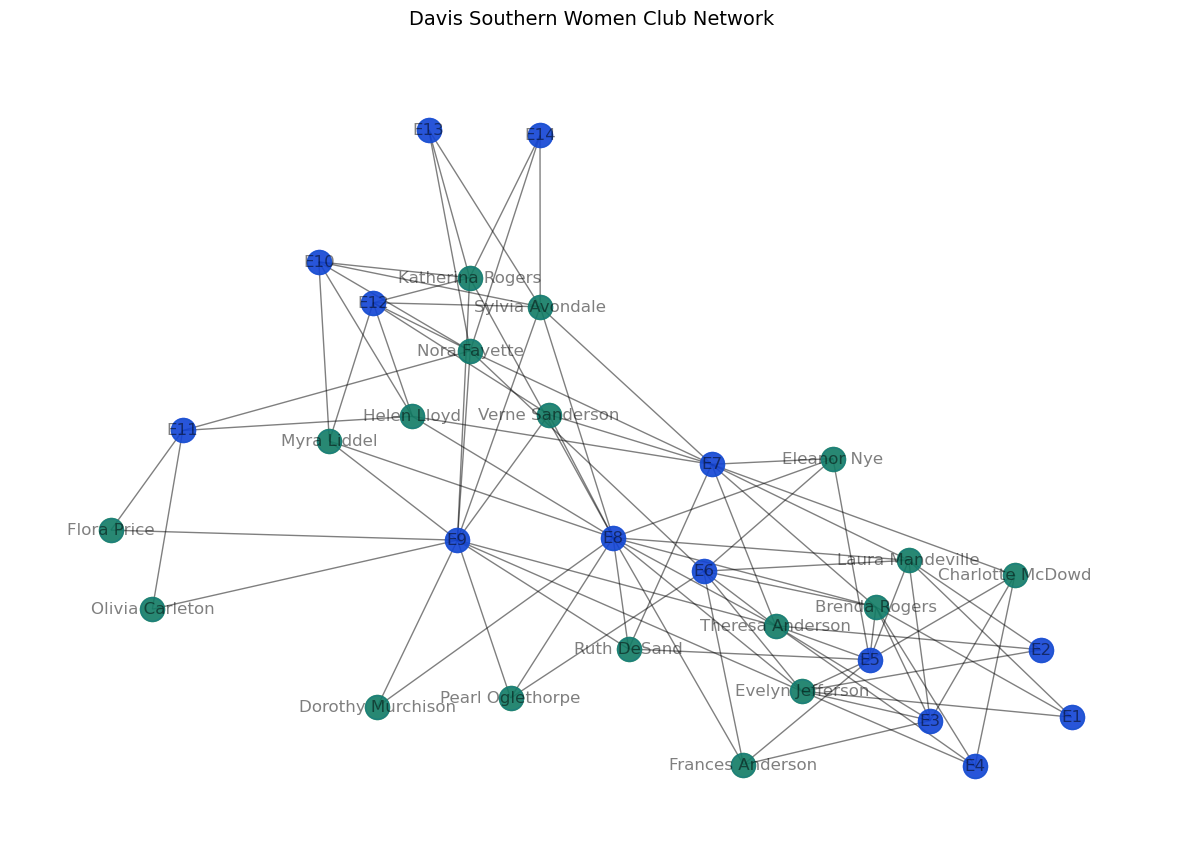

In [95]:
pos = nx.spring_layout(G) 

graph_1=nx.spring_layout (G)
#women_degree_cent=nx.degree(G,women)
#clubs_degree_cent =nx.degree(G,clubs)
plt.figure(1,figsize=(15,10)) 
plt.axis('off')

nx.draw_networkx_nodes(G,pos,
                       nodelist=women,
                       node_color='g',
                       #node_size=[v * 100 for v in dict(women_degree_cent).values()],
                   alpha=0.8)


nx.draw_networkx_nodes(G,pos,
                       nodelist=clubs,
                       node_color='b',
                       #node_size=[v * 100 for v in dict(clubs_degree_cent).values()],
                   alpha=0.8)

plt.text(0.5, 1.05, "Davis Southern Women Club Network", fontsize=14, ha='center', transform=plt.gca().transAxes)
nx.draw_networkx(G,pos,width=1.0,alpha=0.5)

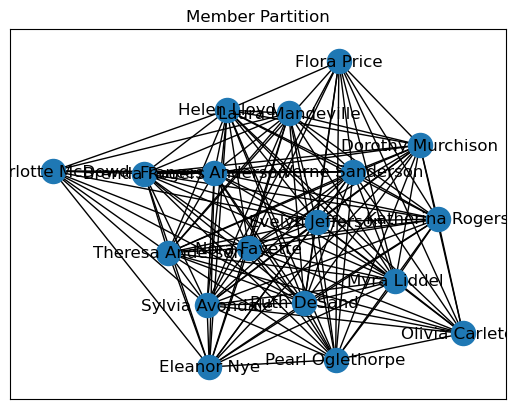

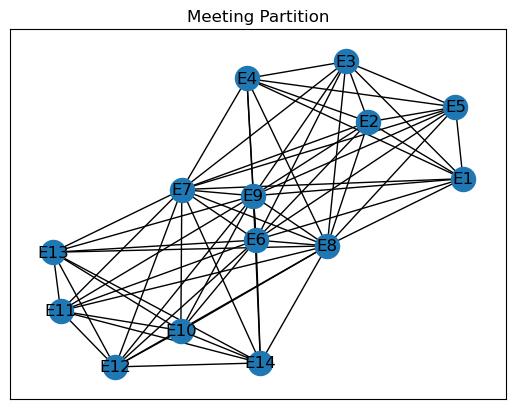

In [96]:
women_graph = bipartite.projected_graph(G, women)
pos = nx.spring_layout(women_graph)
nx.draw_networkx(women_graph, pos=pos, with_labels=True)
plt.title("Member Partition")
plt.show()


club_graph = bipartite.projected_graph(G, clubs)
pos = nx.spring_layout(club_graph)
nx.draw_networkx(club_graph, pos=pos, with_labels=True)
plt.title("Meeting Partition")
plt.show()

***Step 4: Centrality Calculations***   

Various measures of centrality were then calculated including degree centrality, weighted degree centrality, closeness centrality, betweeness centrality and eigenvector centrality.  Below is a brief description of each centrality measure:

*Degree*: A count of unique club members who attend the same meetings.  If a member attends two of the same meetings as another member, this relationship is only counted once.

*Degree (weighted)*: The total count of club members who attended the same meetings as an member.  This is a non-unique count of members who attended meetings.  If a member attends two of the same meetings as another member, this relationship is counted twice.

*Closeness centrality*: A measure based on the shortest path between two nodes.  Closeness centrality measures the average distance from a node to all other nodes in a network

*Betweeness centrality*: A measure of how often that particular node acts as a intermediatory between other nodes.

*Eigenvector centrality*: A measure which calculated by the centrality of neighboring nodes.  A node which is conected to other nodes of high centrality will have higher eigenvector centrality scores. 



In [97]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


#centrality calculations

W  = bipartite.projected_graph(G, women)
C  = nx.closeness_centrality(W) 
B  = nx.betweenness_centrality(W) 
D  = nx.degree_centrality(W)
E  = nx.eigenvector_centrality(W)
#weighted
W  = bipartite.projected_graph(G, women)
W2 = bipartite.weighted_projected_graph(G, women)
#C2  = nx.closeness_centrality(W2) 
#B2  = nx.betweenness_centrality(W2) 
#D2  = nx.degree(W2)
#degee_cent=nx.degree_centrality(G)


data = []
for w in women:
    Friends = W.degree(w)
    Friend_Meetings = W2.degree(w, weight='weight')
    Closeness_value = C[w]
    Betweenness=B[w]
    Degree=D[w]
    Meetings_Attended=women_degree_cent[w]
    Eigenvector=E[w]
    
    
    data.append((w,Meetings_Attended,  Friend_Meetings,Friends
                 ,Closeness_value#, Closeness_value_weighted      
                 ,Betweenness#, Betweenness_weighted
                 ,Degree#,Degree_weighted
                 ,Eigenvector
                ))

df = pd.DataFrame(data, columns=["Member","Meetings Attended","# of Times Met w Friends","Degree"
                                 ,"Closeness"#,"Closeness Centrality Weighted"
                                 ,"Betweenness"#,"Betweenness Centrality Weighted"
                                 ,"Degree_Cent"#,"Degree Centrality Weighted"
                                 ,"Eigenvector"
                                ]
                                )
df.sort_values(by='Degree',ascending=False)
#print(df.to_string(index=False))

,Member,Meetings Attended,# of Times Met w Friends,Degree,Closeness,Betweenness,Degree_Cent,Eigenvector
0,Evelyn Jefferson,8,50,17,1.000000,0.010122,1.000000,0.253524
8,Ruth DeSand,4,40,17,1.000000,0.010122,1.000000,0.253524
14,Helen Lloyd,5,34,17,1.000000,0.010122,1.000000,0.253524
13,Nora Fayette,8,43,17,1.000000,0.010122,1.000000,0.253524
12,Sylvia Avondale,7,46,17,1.000000,0.010122,1.000000,0.253524
9,Verne Sanderson,4,38,17,1.000000,0.010122,1.000000,0.253524
2,Theresa Anderson,8,57,17,1.000000,0.010122,1.000000,0.253524
7,Pearl Oglethorpe,3,31,16,0.944444,0.005348,0.941176,0.243157
10,Myra Liddel,4,33,16,0.944444,0.005348,0.941176,0.243157
11,Katherina Rogers,6,37,16,0.944444,0.005348,0.941176,0.243157


***Step 5: Commentary***   
The number of meetings attended by members varies between eight and two meetings.  The average number of events attended by members of the group is approximatley 5 (avg=4.8). 

**Degree centrality (range 1.0-0.64)**: Of note and providing evidence of the group's interconnectivity, is high degree centrality scores for all members.  The average number of degree connections for all members is 14.5, which is very close to 17, the highest possible value.  The degree centrality scores, ranging from 1.0-0.64, provide significant evidence of the groups interconnectivity.  

<blockquote>Comment on members who only attended 2 meetings:
    Flora Price and Olivia Carleton attended only two meetings but were connected to two-thirds of the total member population(degree=12 for both; degree centrality=0.71 for both) in those two meetings. Dorothy Murchison, while also only attending two meetings, was connected to 16 out of the 17 members in those two meetings(degree centrality= 0.94). </blockquote> 
<blockquote>Comment on members with lowest centrality:
    Charlotte McDowd had a centrality of 0.64 (11 degrees) althought she attended four meetings. Although the degree centrality is the lowest of the cohort, the degree centrality is still relatively high and also demonstrates that some meetings are more important than others with regard to the exposure to other group members.</blockquote>

**Closeness centrality (range: 1.0-0.74)**:  The closeness centrality ranges between 1.0 - 0.74 and denotes that the nodes in the group are relatively close to eachother.  It denotes these members have access to eachother.

**Betweenness Centrality (range: 0.01-0.00)**:  A betweeness range of 0.01-0.00 indicates that the nodes are not very influencial over other nodes ability to attend meetings, as these members are not essential for the connectiveness of the network as a whole.  In other words the network would function in its current state should any member stop attending meetings. A betweeness centrality in this range denotes that the network is connected at multiple points and there are relatively few bottlenecks/gatekeepers/ extremely influencial members.  

**Eigenvector Centrality (range: 0.25-0.17)**: This score is relatively low denoting the lack of importance each member has in relation to the network as a whole. It provides further evidence that the network is connected by various members, no individual member exhibiting extraordinary influence over the cohesiveness of the network.

***Step 6: Island Method***   
Island method was applied to gain insight to relationships among club members.  The below graphs apply island methodology 
to members who have a degree centrality of 11 (the lowest degree centrality), a degree centrality of 16, and finally  a degree centrality of 17(the highest degree centrality).

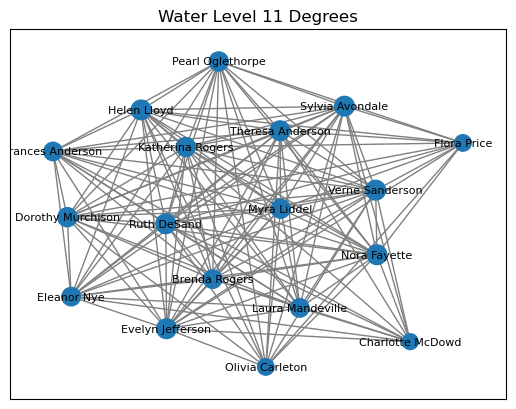

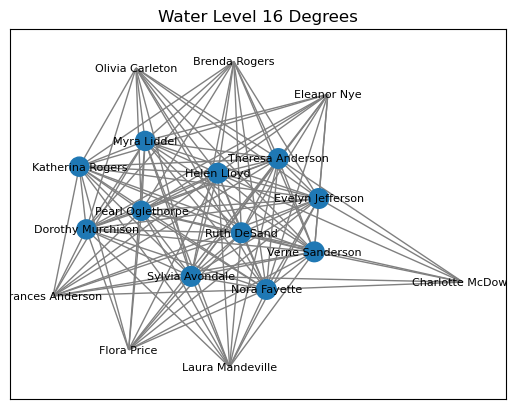

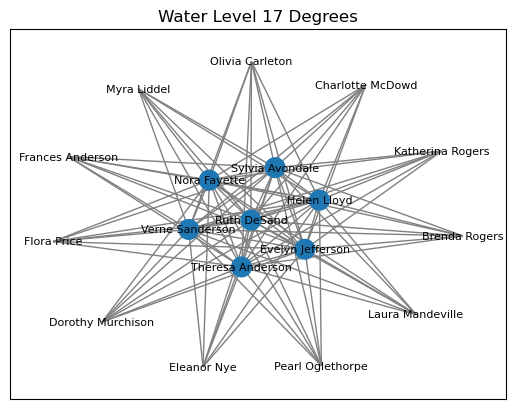

In [104]:
# Apply the island method
#df filtered to degree=11
water_level_df=df.loc[df['Degree']>=11]

W4 = bipartite.projected_graph(G, water_level_df['Member'])

islands = []
visited = set()
for node in water_level_df['Member']:
    if node not in visited:
        island = nx.node_connected_component(W4, node)
        islands.append(island)
        visited.update(island)

# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = water_level_df[water_level_df['Member'].isin(island)]
    dfs.append(island_df)

# Create a new graph to combine all islands
water_level_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    water_level_graph.add_edges_from(W4.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(water_level_graph)

# Get the count values for each node
count_values = water_level_df.groupby('Member')['Degree_Cent'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 200 for node in water_level_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(water_level_graph,
                 pos,
                 with_labels=True,
                 #node_color='blue',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 11 Degrees")

# Display the plot
plt.show()


########################16 degree################

# Apply the island method
#df filtered to degree=17
water_level_df=df.loc[df['Degree']>=16]

W4 = bipartite.projected_graph(G, water_level_df['Member'])

islands = []
visited = set()
for node in water_level_df['Member']:
    if node not in visited:
        island = nx.node_connected_component(W4, node)
        islands.append(island)
        visited.update(island)

# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = water_level_df[water_level_df['Member'].isin(island)]
    dfs.append(island_df)

# Create a new graph to combine all islands
water_level_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    water_level_graph.add_edges_from(W4.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(water_level_graph)

# Get the count values for each node
count_values = water_level_df.groupby('Member')['Degree_Cent'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 200 for node in water_level_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(water_level_graph,
                 pos,
                 with_labels=True,
                 #node_color='blue',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 16 Degrees")

# Display the plot
plt.show()
########################17 degree################

# Apply the island method
#df filtered to degree=17
water_level_df=df.loc[df['Degree']>=17]

W4 = bipartite.projected_graph(G, water_level_df['Member'])

islands = []
visited = set()
for node in water_level_df['Member']:
    if node not in visited:
        island = nx.node_connected_component(W4, node)
        islands.append(island)
        visited.update(island)

# Create a DataFrame for each island
dfs = []
for i, island in enumerate(islands):
    island_df = water_level_df[water_level_df['Member'].isin(island)]
    dfs.append(island_df)

# Create a new graph to combine all islands
water_level_graph = nx.Graph()

# Add edges from each island to the combined graph
for island in islands:
    water_level_graph.add_edges_from(W4.subgraph(island).edges())

# Create a layout for the combined graph
pos = nx.spring_layout(water_level_graph)

# Get the count values for each node
count_values = water_level_df.groupby('Member')['Degree_Cent'].sum()

# Determine the maximum count for scaling node sizes
max_count = np.max(count_values.values)

# Compute the node sizes based on count
node_sizes = [count_values.get(node, 0) / max_count * 200 for node in water_level_graph.nodes]

# Plot the combined graph with proportional node sizes
plt.figure()
nx.draw_networkx(water_level_graph,
                 pos,
                 with_labels=True,
                 #node_color='blue',
                 node_size=node_sizes,
                 edge_color='gray',
                 font_size=8,
                )
plt.title("Water Level 17 Degrees")

# Display the plot
plt.show()

The final graph demonstrates that there are seven club members with a degree measurement of seventeen. These seven members have attended at least one meeting with every member of the social club.

***Step 7: Drill Down***    
Below Dorothy Murchison's network is graphed to further demonstate: 1. the interconnectiveness of the network, 2. the relative lack of influence of any single individual, and 3. the importance some meeting had over others in terms of exposing members to other members. Dorothy only attended two meetings but her centrality scores are second to the highest (Dorothy degree=16, Dorothy degree centrality = 0.94).  Below Dorothy's network is graphed.  Dorothy attended 2 meeting but was exposed to sixteen other members at these two meetings. These two meetings, E8 and E9 happen, to be the most attended meetings of the meeting cohort.

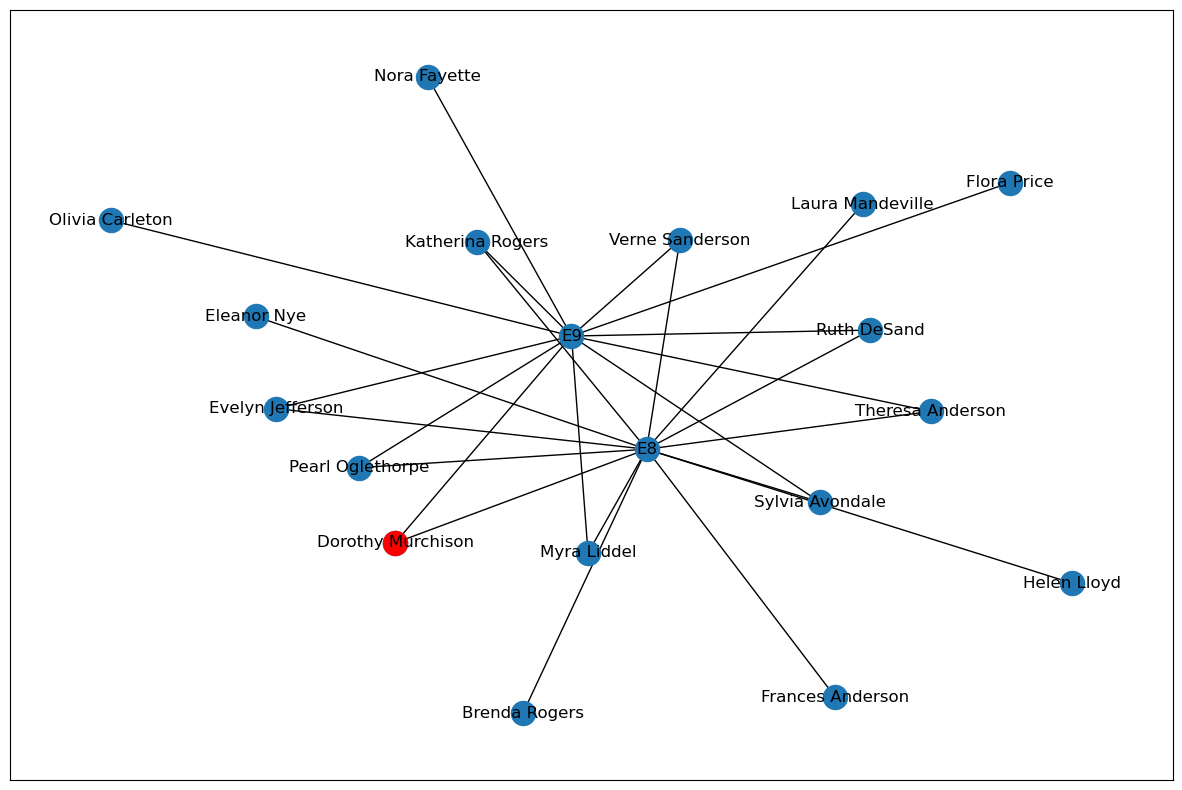

In [105]:
dorothy = nx.Graph(nx.ego_graph(G, 'Dorothy Murchison', radius=2))

pos = nx.spring_layout(dorothy)  # Compute the node positions
plt.figure(2, figsize=(15, 10)) 
nx.draw_networkx(dorothy, pos=pos, with_labels=True)
nx.draw_networkx_nodes(dorothy, pos=pos, nodelist=['Dorothy Murchison'], node_color='red')

plt.show()

***Step 8: Conclusion***    
The 'Davis Southern Women Club' members were a group of highly interconnected individuals as denoted by high degree score, high degree centrality scores and high closeness centrality scores.  The low betweeness and eigenvector centrality scores denote relative lack of influence one member has over another in the network as a whole.  The application of the 'island method', as well as the subgroup of Dorothy Murchison's network, further reinforced the above findings.  Additionally, it appears meetings E9 and E8 may possibly be meetings of greater importance or interested to group members as denoted by higher attendence.  